# Задание 3.

Загрузите [данные по изменению температуры поверхности земли](https://www.kaggle.com/datasets/berkeleyearth/climate-change-earth-surface-temperature-data). Для этого может понадобится зарегистрироваться на [Kaggle](https://kaggle.com). Затем нужно будет работать с данными, которые содержатся в файле **GlobalLandTemperaturesByMajorCity.csv**

In [235]:
import zipfile

import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

with open("GlobalLandTemperaturesByMajorCity.csv") as f:
    df = pd.read_csv(f, parse_dates=["dt"])

df

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1849-01-01,26.704,1.435,Abidjan,Côte D'Ivoire,5.63N,3.23W
1,1849-02-01,27.434,1.362,Abidjan,Côte D'Ivoire,5.63N,3.23W
2,1849-03-01,28.101,1.612,Abidjan,Côte D'Ivoire,5.63N,3.23W
3,1849-04-01,26.140,1.387,Abidjan,Côte D'Ivoire,5.63N,3.23W
4,1849-05-01,25.427,1.200,Abidjan,Côte D'Ivoire,5.63N,3.23W
...,...,...,...,...,...,...,...
239172,2013-05-01,18.979,0.807,Xian,China,34.56N,108.97E
239173,2013-06-01,23.522,0.647,Xian,China,34.56N,108.97E
239174,2013-07-01,25.251,1.042,Xian,China,34.56N,108.97E
239175,2013-08-01,24.528,0.840,Xian,China,34.56N,108.97E


# Задание 3.1 (1 балл)

В последующих заданиях будут учитываться данные начиная с 01.01.1950. Для этого создайте новый `DataFrame`, в котором удалены все строки до 01.01.1950. Используйте созданный DataFrame в последующих заданиях.  

In [141]:
df = df[df.dt >= '1950-01-01']
df.head()


,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
1212,1950-01-01,26.773,0.239,Abidjan,Côte D'Ivoire,5.63N,3.23W
1213,1950-02-01,27.527,0.348,Abidjan,Côte D'Ivoire,5.63N,3.23W
1214,1950-03-01,28.344,0.431,Abidjan,Côte D'Ivoire,5.63N,3.23W
1215,1950-04-01,27.830,0.467,Abidjan,Côte D'Ivoire,5.63N,3.23W
1216,1950-05-01,26.896,0.248,Abidjan,Côte D'Ivoire,5.63N,3.23W


# Задание 3.2 (2 балла)

Постройте график среднегодовых температур в городе Торонто.

<Axes: xlabel='dt'>

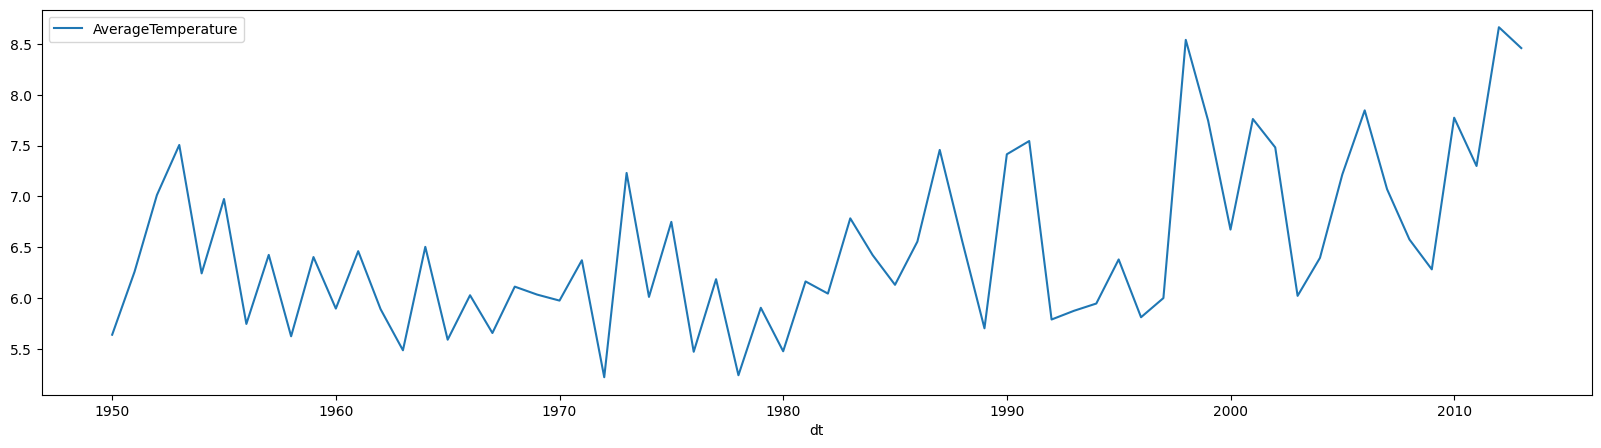

In [152]:
df_Toronto = df[df['City'] == 'Toronto']

df_Toronto_mean_by_year = df_Toronto[['AverageTemperature']].groupby(df_Toronto.dt.dt.year).agg('mean')

df_Toronto_mean_by_year.plot(figsize=(20,5))

# Задание 3.3 (2 балла)

Найдите город, для которого выборочная дисперсия температур на приведенных данных максимальна.

In [148]:
df_city = df.groupby('City').var()
df_city[df_city['AverageTemperature'] == df_city['AverageTemperature'].max()]

<ipython-input-148-b31bf77e64e6>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.var is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_city = df.groupby('City').var()


,AverageTemperature,AverageTemperatureUncertainty
City,,
Harbin,218.898616,0.024645


# Задание 3.4 (4 балла)

На одной оси постройте графики, отображающие:
1. Зависимость выборочной дисперсии температур от широты города (Latitude).
2. Зависимость средней температуры в январе 1975 года от широты города (Latitude).
3. Зависимость средней температуры в июле 1975 года от широты города (Latitude).

<ipython-input-154-b2a40d7caf82>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.var is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_city = df.groupby('Latitude').var()
<ipython-input-154-b2a40d7caf82>:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_city = df_city.groupby('Latitude').mean()
<ipython-input-154-b2a40d7caf82>:9: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_city = df_city.groupby('Latitude').mean()


<Axes: xlabel='Latitude'>

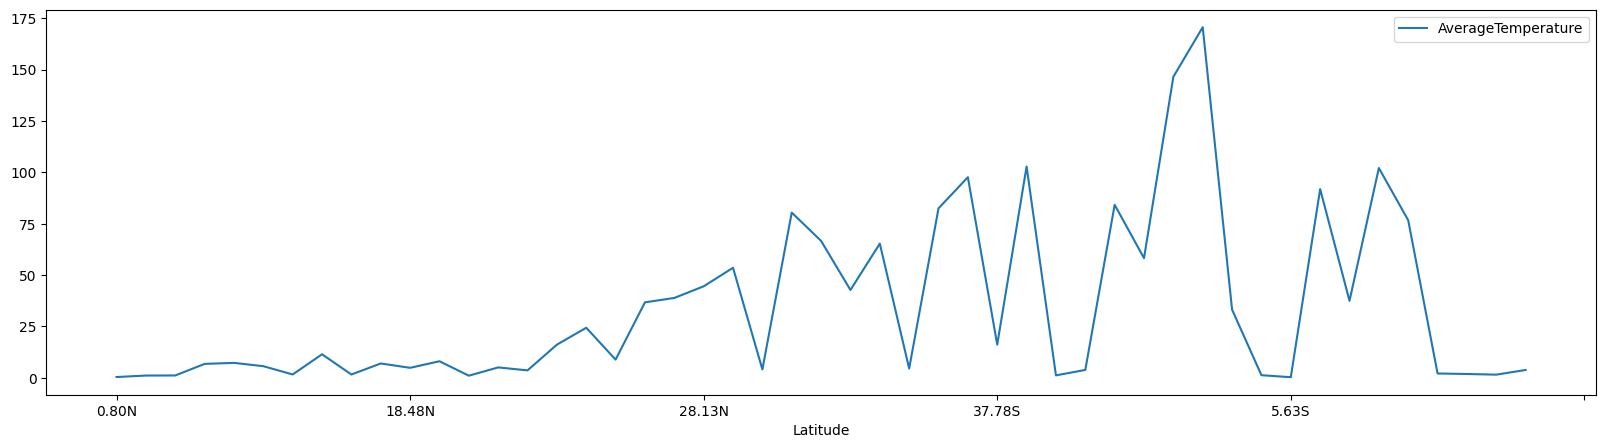

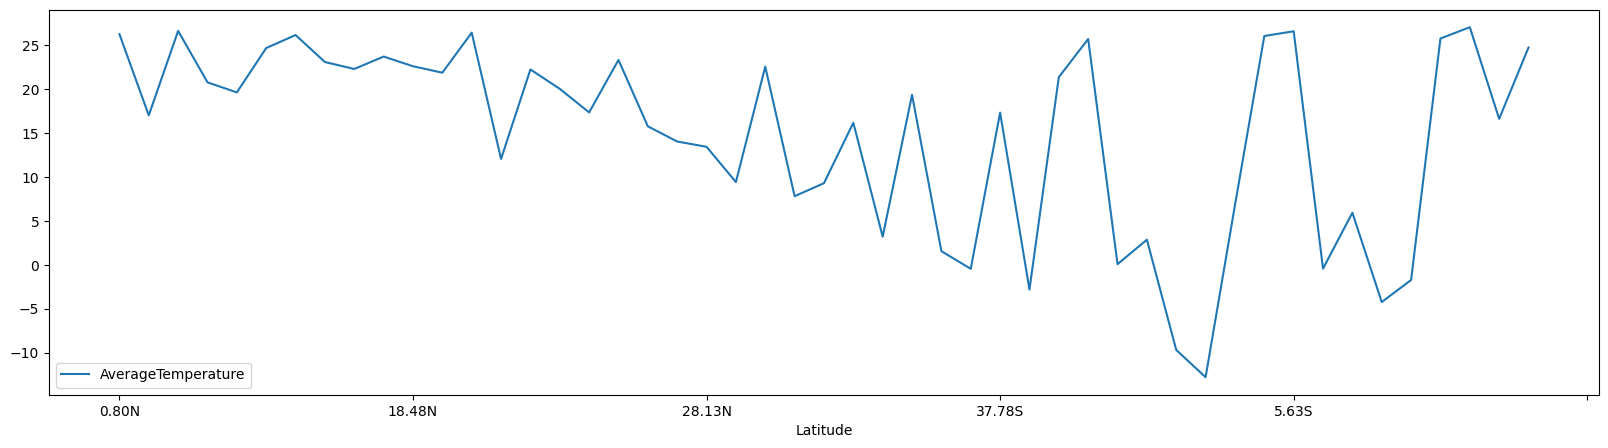

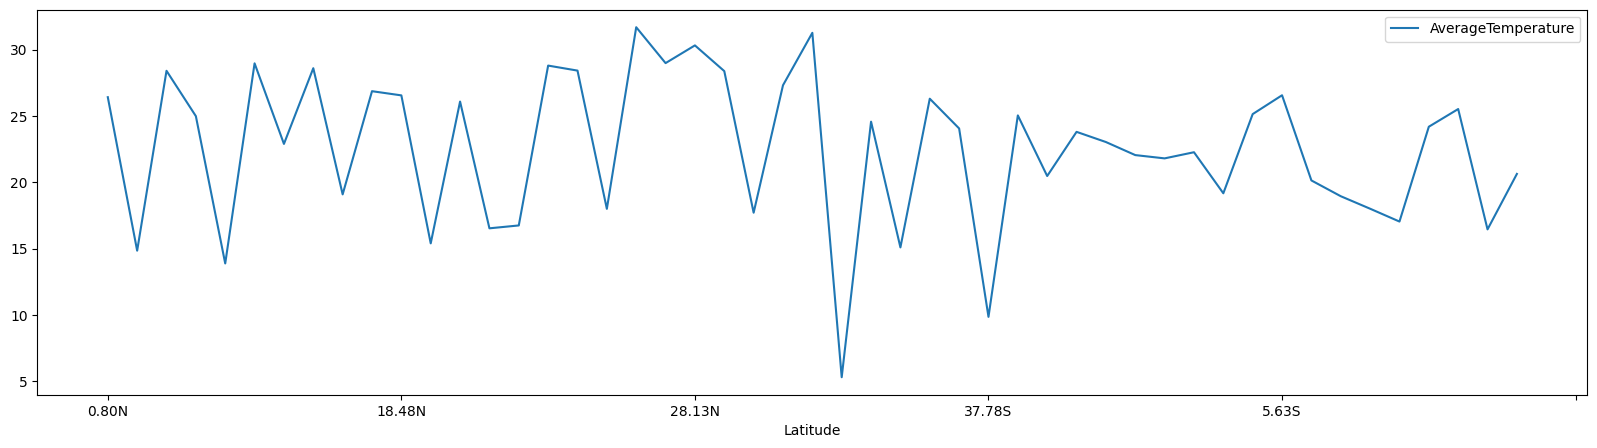

In [154]:
df_city = df.groupby('Latitude').var()
df_city.plot(y='AverageTemperature', figsize=(20, 5))

df_city = df[df.dt == '1975-01-01']
df_city = df_city.groupby('Latitude').mean()
df_city.plot(y='AverageTemperature', figsize=(20, 5))

df_city = df[df.dt == '1975-07-01']
df_city = df_city.groupby('Latitude').mean()
df_city.plot(y='AverageTemperature', figsize=(20, 5))

# Задание 3.5 (6 баллов)

Посчитайте данные по среднегодовой температуре в Санкт-Петербурге. Определите года, в которых средняя температура была выше, чем в предыдущем  и последующем году. Постройте график среднегодовой температуры и обозначьте на нём найденные года (произвольным образом).

Постройте модель линейной регрессии (можно использовать [LinearRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)): $\mathbb{год} \rightarrow \mathbb{средняя\_температура}$. Отобразите прямую на предыдущем графике.

<ipython-input-155-133c515eefb0>:7: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_spb = df_spb.groupby(df_spb.dt.dt.year).mean()


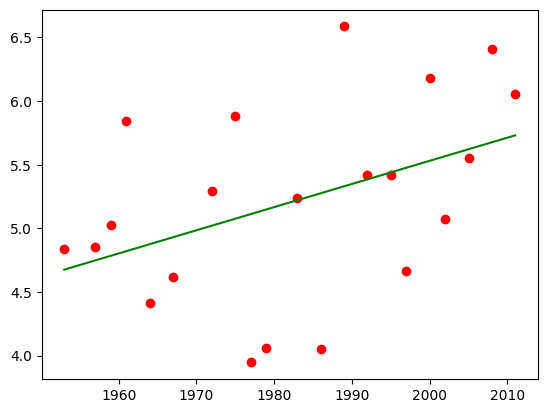

In [155]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Посчитайте данные по среднегодовой температуре в Санкт-Петербурге.
df_spb = df[df.City == 'Saint Petersburg']
df_spb = df_spb.groupby(df_spb.dt.dt.year).mean()

# Определите года, в которых средняя температура была выше, чем в предыдущем  и последующем году.
df_spb['AverageTemperaturePrev'] = df_spb.AverageTemperature.shift(1)
df_spb['AverageTemperatureNext'] = df_spb.AverageTemperature.shift(-1)
df_spb = df_spb[(df_spb.AverageTemperature > df_spb.AverageTemperaturePrev) & (df_spb.AverageTemperature > df_spb.AverageTemperatureNext)]
df_spb

# Постройте график среднегодовой температуры и обозначьте на нём найденные года (произвольным образом).
plt.scatter(df_spb.index, df_spb.AverageTemperature, c='red')

# Постройте модель линейной регрессии (можно использовать [LinearRegression]): год -> средняя_температура.
# Отобразите прямую на предыдущем графике.
X = df_spb.index.values.reshape(-1, 1)
y = df_spb.AverageTemperature.values.reshape(-1, 1)
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)
plt.plot(X, y_pred, c='green')
plt.show()

# Задание 3.6 (4 балла)

Найдите города, для которых:
1. Разница между максимальным и минимальным значением среднегодовой температуры в выборке максимальна.
2. Самая большая средняя разница между средней температурой января и средней температурой июля.
3. Наибольшее среднее количество месяцев с отрицательной температурой в году.

In [156]:
# Найдите города, для которых:
# 1. Разница между максимальным и минимальным значением среднегодовой температуры в выборке максимальна.
# 2. Самая большая средняя разница между средней температурой января и средней температурой июля.
# 3. Наибольшее среднее количество дней с отрицательной температурой в году.

# 1. Разница между максимальным и минимальным значением среднегодовой температуры в выборке максимальна.
df.groupby('City').agg({'AverageTemperature': ['min', 'max']}).apply(lambda x: x[1] - x[0], axis=1).sort_values(ascending=False).head(1)

City
Harbin    49.279
dtype: float64

In [157]:
# 2. Самая большая средняя разница между средней температурой января и средней температурой июля.
df['Month'] = df.dt.dt.month
df.groupby('City').apply(lambda x: x[x.Month == 1].AverageTemperature.mean() - x[x.Month == 7].AverageTemperature.mean()).sort_values(ascending=False).head(1)

<ipython-input-157-31f35a5ab5a4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Month'] = df.dt.dt.month


City
Santiago    13.273109
dtype: float64

In [158]:
# 3. Наибольшее среднее количество дней с отрицательной температурой в году.
df.groupby('City').apply(lambda x: x[x.AverageTemperature < 0].dt.dt.year.value_counts().mean()).sort_values(ascending=False).head(1)

City
Harbin    4.90625
dtype: float64

# Задание 3.7 (3 балла)

Отобразите города на карте, например с помощью [geopandas/folium](https://geopandas.org/en/stable/gallery/plotting_with_folium.html) или [plotly](https://plotly.com/python-api-reference/generated/plotly.express.scatter_geo.html). Причем цвет метки должен соответствовать средней температуре в январе за последние 10 лет.


**\***(+3 балла). Вычислите прямую с "трендом" по изменению средней температуры за год в каждом городе в период 1950-2013 (можно с помощью линейной регрессии, как в задании **3.5**). Отобразите города цветом, который зависит от угла наклона этой прямой.


**\***(+1 балл) В дополнение к предыдущему пункту, используйте библиотеку [pwlf](https://pypi.org/project/pwlf/) с фиксированным числом сегментов и визуализируйте угол наклона последнего сегмента.

In [254]:
# Отобразите города на карте, например с помощью [geopandas/folium]. Причем цвет метки должен соответствовать средней температуре в январе за последние 10 лет.
# Вычислите прямую с "трендом" по изменению температуры в каждом городе в период 1950-2013. Отобразите города цветом, который зависит от угла наклона этой прямой.
# Используйте библиотеку [pwlf](https://pypi.org/project/pwlf/) с фиксированным числом сегментов и угол наклона последнего сегмента.

# Отобразите города на карте, например с помощью [plotly](https://plotly.com/python-api-reference/generated/plotly.express.scatter_geo.html). Причем цвет метки должен соответствовать средней температуре в январе за последние 10 лет.

import geopandas as gpd
import folium
import pandas as pd
import numpy as np
import pwlf

with open("GlobalLandTemperaturesByMajorCity.csv") as f:
    df = pd.read_csv(f, parse_dates=["dt"])

# данные только за последние 10 лет
df = df[(df.dt.dt.year >= 2004) & (df.dt.dt.month == 1)]
prepared_df = df
prepared_df.Longitude = df.Longitude.apply(lambda x: float(x[:-1]))
prepared_df.Latitude = df.Latitude.apply(lambda x: float(x[:-1]))

# группировка по городам и рассчет средней температуры января за последние 10 лет
city_temps = prepared_df.groupby(['City', 'Longitude', 'Latitude']).mean()['AverageTemperature'].reset_index()

# создаем geopandas dataframe с помощью долготы и ширины города
gdf = gpd.GeoDataFrame(city_temps, geometry=gpd.points_from_xy(city_temps.Longitude, city_temps.Latitude))

# создаем карту
m = folium.Map(location=[df.Latitude.mean(), df.Longitude.mean()], zoom_start=2)

# добавляем маркер для каждого города с надписью, показывающей среднюю температуру
for idx, row in gdf.iterrows():
    folium.Marker(location=[row['Latitude'], row['Longitude']], popup=row['AverageTemperature'], icon=folium.Icon(color=row['AverageTemperature'])).add_to(m)

# отобразим карту
m


<ipython-input-254-5d668f2225d8>:23: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  city_temps = prepared_df.groupby(['City', 'Longitude', 'Latitude']).mean()['AverageTemperature'].reset_index()
<ipython-input-254-5d668f2225d8>:33: UserWarning: color argument of Icon should be one of: {'gray', 'beige', 'lightgray', 'lightblue', 'lightgreen', 'white', 'lightred', 'red', 'darkgreen', 'black', 'darkpurple', 'blue', 'darkblue', 'purple', 'orange', 'cadetblue', 'pink', 'green', 'darkred'}.
  folium.Marker(location=[row['Latitude'], row['Longitude']], popup=row['AverageTemperature'], icon=folium.Icon(color=row['AverageTemperature'])).add_to(m)


In [358]:
# вычисляем линию с «тенденцией» изменения температуры в каждом городе в период 1950-2013 гг.
with open("GlobalLandTemperaturesByMajorCity.csv") as f:
    df = pd.read_csv(f, parse_dates=["dt"])

df = df[(df['dt'] >= '1950-01-01') & (df['dt'] < '2014-01-01')]
prepared_df = df
prepared_df.Longitude = df.Longitude.apply(lambda x: float(x[:-1]))
prepared_df.Latitude = df.Latitude.apply(lambda x: float(x[:-1]))
prepared_df['Year'] = df.dt.dt.year

# группируем данные по городам и годам, рассчитываем среднюю температуру за каждый год
city_year_temps = prepared_df.groupby(['City', 'Year', 'Longitude', 'Latitude']).mean()['AverageTemperature'].reset_index()

# создаем словарь для хранения тенденций для каждого города
trends = {}

# проходим по каждому городу
for city, city_df in city_year_temps.groupby('City'):
    # подводим к данным кусочно-линейную функцию с фиксированным количеством сегментов
    model = pwlf.PiecewiseLinFit(city_df['Year'], city_df['AverageTemperature'])
    model.fit(3)

    # сохраняем наклон последнего сегмента в словаре трендов
    trends[city] = model.slopes[-1]


<ipython-input-358-8f43409ced9a>:12: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  city_year_temps = prepared_df.groupby(['City', 'Year', 'Longitude', 'Latitude']).mean()['AverageTemperature'].reset_index()


In [359]:
# создаем данные geopandas с широтой и долготой города
gdf = gpd.GeoDataFrame(pd.DataFrame.from_dict(trends, orient='index', columns=['slope']), geometry=gpd.points_from_xy(city_temps['Longitude'], city_temps['Latitude']))

# создаем карту
m = folium.Map(location=[df.Latitude.mean(), df.Longitude.mean()], zoom_start=3)

# добавляем маркер для каждого города с надписью, показывающей среднюю температуру
for idx, row in gdf.iterrows():
    # определяем разные цвета на основе значений «наклона».
    if row['slope'] > 0:
        color = 'darkred'
    elif row['slope'] < 0:
        color = 'darkblue'
    else:
        color = 'gray'

    folium.Marker(location=[row.geometry.y, row.geometry.x],
                  popup=row['slope'],
                  icon=folium.Icon(color=color)).add_to(m)

# отображаем карту
m